## Modelo de Machine Learning - Previsão de Vendas de Cancelamento de Operadora TV a Cabo <br>

### Um breve resumo do que iremos fazer<br>
<p> 1 - Analise Exploratória das variáveis Categóricas e Numéricas utilizando diversos gráficos<br>    
<p> 2 - Tratamento de Dados e Engenharia de Atributos <br>
<p> 3 - Identificar e Tratar OUTLIERS e Valores Missing<br>    
<p> 3 - Muitas funções do Pacote Pandas <br>    
<p> 4 - OneHotEncoding e Padronização de Dados <br>
<p> 4 - Criar, Treinar e Avaliar o Algoritmo de Machine Learning <br><br>
    
E muito mais...




In [ ]:
# Importando os pacotes que serão utilizados

# Para manipulação e tratamento dos dados
import numpy as np
import pandas as pd 
import time #utilizada para funções de tempo
import matplotlib.pyplot as plt #Utilizada para gráficos
import seaborn as sns #Utilizada para gráficos

# Bibliotecas do Skit Learn
from sklearn.model_selection import train_test_split #Utilizada para separar dados pra treino e teste
from sklearn.preprocessing import StandardScaler #Utilizada para fazer a padronização dos dados
from sklearn.preprocessing import LabelEncoder #Utilizada para fazer o OneHotEncoding
from sklearn.metrics import accuracy_score #Utilizada para avaliar a acurácia do modelo preditivo
from sklearn.neighbors import KNeighborsClassifier #Nosso Algoritmo para criação do modelo
from imblearn import under_sampling, over_sampling #Utilizada para fazer o balanceamento de dados
from imblearn.over_sampling import SMOTE #Utilizada para fazer o balanceamento de dados


# Para remover avisos de alerta
import warnings #Utilizada para avisos de alertas
warnings.filterwarnings("ignore") #Ignorar avisos de alertas. Obs.: Alertas NÃO são erros, são apenas mensagens informativas


# Para não limitar a exibição do DataFrame
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
#pd.options.display.float_format = '{:.2f}'.format

## Coleta de Dados
<p> Utilizaremos o arquivo dados.csv para importar os nosso dataset

In [4]:
#df_original = pd.read_csv("dados.csv", sep = ';', encoding="ISO-8859-1")
df_original = pd.read_csv("dados.csv", sep = ';')

## Analise Exploratória

<p> Vamos analisar as variáveis categoricas e númericas e identificar os dados que precisarão ser tratados

In [5]:
# Visualizar as Linhas e Colunas do Arquivo --> Observações e Variáveis
df_original.shape

(448447, 24)

In [6]:
# Visualizar as primeiras linha do arquivo
df_original.head()

,ID_CLIENTE,FORMA_AQUISICAO,IDADE_CLIENTE,SEXO,QT_FILHOS,DT_AQUISICAO,DT_CANCELAMENTO,DIAS_ATIVO,MESES_ATIVO,DURACAO_CONTRATO,VL_PLANO_ADESAO,VL_PLANO_ATUAL,NOME_PRODUTO,QT_PONTOS_INSTALADOS,QT_PC_PAGAS,QT_PC_VENCIDAS,QT_PC_PAGA_ATRASO,QT_PC_PAGA_EM_DIA,QT_ACORDO_PAGAMENTO,VL_MENSALIDADE_ATRASO,VL_MENSALIDADE_DT_AQUISICAO,VL_MENSALIDADE_DT_ATUAL,SITUACAO,COD_SITUACAO
0,1,Site,23,MASCULINO,0.0,18/06/2021,NaN,33,1,48 Meses,450,518,PLANO FAMILIA (100 CANAIS HD),1,1,4,0,1,1,2070,450,518,ATIVO,0
1,2,Vendedor,24,FEMININO,0.0,10/04/2018,NaN,1198,39,48 Meses,230,265,PLANO BASICO (30 CANAIS HD),2,5,0,1,4,0,0,230,265,ATIVO,0
2,3,Site,25,MASCULINO,0.0,09/10/2020,NaN,285,9,48 Meses,290,334,PLANO BASICO PLUS (50 CANAIS HD),3,5,0,3,2,0,0,290,334,ATIVO,0
3,4,Vendedor,26,FEMININO,17.0,25/06/2019,NaN,757,25,48 Meses,230,265,PLANO BASICO (30 CANAIS HD),1,5,0,1,4,0,0,230,265,ATIVO,0
4,5,Vendedor,27,MASCULINO,0.0,19/09/2019,NaN,671,22,48 Meses,230,265,PLANO BASICO (30 CANAIS HD),2,5,0,5,0,0,0,230,265,ATIVO,0


In [7]:
# Verificar os tipos de dados das variáveis
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448447 entries, 0 to 448446
Data columns (total 24 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   ID_CLIENTE                   448447 non-null  int64  
 1   FORMA_AQUISICAO              448447 non-null  object 
 2   IDADE_CLIENTE                448447 non-null  int64  
 3   SEXO                         448447 non-null  object 
 4   QT_FILHOS                    448193 non-null  float64
 5   DT_AQUISICAO                 448447 non-null  object 
 6   DT_CANCELAMENTO              117455 non-null  object 
 7   DIAS_ATIVO                   448447 non-null  int64  
 8   MESES_ATIVO                  448447 non-null  int64  
 9   DURACAO_CONTRATO             448447 non-null  object 
 10  VL_PLANO_ADESAO              448447 non-null  int64  
 11  VL_PLANO_ATUAL               448447 non-null  int64  
 12  NOME_PRODUTO                 448447 non-null  object 
 13 

In [8]:
#Avaliar o período dos dados coletados
inicio = pd.to_datetime(df_original['DT_AQUISICAO']).dt.date.min()
fim = pd.to_datetime(df_original['DT_AQUISICAO']).dt.date.max()
print('Período dos dados - De:', inicio, 'Até:',fim)

Período dos dados - De: 2001-01-01 Até: 2021-06-29


In [9]:
# Resumo estatistico básico do nosso dataset
df_original.describe()

,ID_CLIENTE,IDADE_CLIENTE,QT_FILHOS,DIAS_ATIVO,MESES_ATIVO,VL_PLANO_ADESAO,VL_PLANO_ATUAL,QT_PONTOS_INSTALADOS,QT_PC_PAGAS,QT_PC_VENCIDAS,QT_PC_PAGA_ATRASO,QT_PC_PAGA_EM_DIA,QT_ACORDO_PAGAMENTO,VL_MENSALIDADE_ATRASO,VL_MENSALIDADE_DT_AQUISICAO,VL_MENSALIDADE_DT_ATUAL,COD_SITUACAO
count,448447.000000,448447.000000,448193.000000,448447.000000,448447.000000,448447.000000,448447.000000,448447.000000,448447.000000,448447.000000,448447.000000,448447.000000,448447.000000,448447.000000,448447.000000,448447.000000,448447.000000
mean,224224.000000,38.891140,1.526385,483.857783,15.772457,303.769386,349.798596,1.625269,3.917281,1.019175,0.563596,3.353685,0.188029,337.364498,303.769386,349.798596,0.261915
std,129455.642421,6.682351,0.504288,373.649523,12.252344,113.612746,130.560943,0.579956,1.460079,1.474442,0.886314,1.586924,0.423095,525.953927,113.612746,130.560943,0.439677
min,1.000000,23.000000,0.000000,22.000000,1.000000,230.000000,265.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,230.000000,265.000000,0.000000
25%,112112.500000,35.000000,1.000000,167.000000,5.000000,230.000000,265.000000,1.000000,3.000000,0.000000,0.000000,2.000000,0.000000,0.000000,230.000000,265.000000,0.000000
50%,224224.000000,40.000000,2.000000,329.000000,11.000000,230.000000,265.000000,2.000000,4.000000,0.000000,0.000000,4.000000,0.000000,0.000000,230.000000,265.000000,0.000000
75%,336335.500000,43.000000,2.000000,798.000000,26.000000,350.000000,403.000000,2.000000,5.000000,2.000000,1.000000,5.000000,0.000000,794.000000,350.000000,403.000000,1.000000
max,448447.000000,55.000000,25.000000,1296.000000,42.000000,600.000000,690.000000,3.000000,100.000000,38.000000,17.000000,100.000000,5.000000,16043.000000,600.000000,690.000000,1.000000


In [10]:
# Verificando valores missing
# Variável QT FILHOS deveremos tratar na etapa 2 - Tratamento de Dados
print(df_original.isna().sum())

ID_CLIENTE                          0
FORMA_AQUISICAO                     0
IDADE_CLIENTE                       0
SEXO                                0
QT_FILHOS                         254
DT_AQUISICAO                        0
DT_CANCELAMENTO                330992
DIAS_ATIVO                          0
MESES_ATIVO                         0
DURACAO_CONTRATO                    0
VL_PLANO_ADESAO                     0
VL_PLANO_ATUAL                      0
NOME_PRODUTO                        0
QT_PONTOS_INSTALADOS                0
QT_PC_PAGAS                         0
QT_PC_VENCIDAS                      0
QT_PC_PAGA_ATRASO                   0
QT_PC_PAGA_EM_DIA                   0
QT_ACORDO_PAGAMENTO                 0
VL_MENSALIDADE_ATRASO               0
VL_MENSALIDADE_DT_AQUISICAO         0
VL_MENSALIDADE_DT_ATUAL             0
SITUACAO                            0
COD_SITUACAO                        0
dtype: int64


In [11]:
# Verificando Valores Únicos
df_original.nunique()

ID_CLIENTE                     448447
FORMA_AQUISICAO                     2
IDADE_CLIENTE                      33
SEXO                                2
QT_FILHOS                           7
DT_AQUISICAO                     5888
DT_CANCELAMENTO                  5304
DIAS_ATIVO                       1051
MESES_ATIVO                        42
DURACAO_CONTRATO                    4
VL_PLANO_ADESAO                     6
VL_PLANO_ATUAL                      6
NOME_PRODUTO                        6
QT_PONTOS_INSTALADOS                3
QT_PC_PAGAS                        31
QT_PC_VENCIDAS                     31
QT_PC_PAGA_ATRASO                   9
QT_PC_PAGA_EM_DIA                  30
QT_ACORDO_PAGAMENTO                 6
VL_MENSALIDADE_ATRASO              80
VL_MENSALIDADE_DT_AQUISICAO         6
VL_MENSALIDADE_DT_ATUAL             6
SITUACAO                            2
COD_SITUACAO                        2
dtype: int64

### Analisando as Variáveis Categoricas (FORMA_AQUISICAO, SEXO, DURACAO_CONTRATO, NOME_PRODUTO, SITUACAO)

In [12]:
# Agrupar os valores da variável 
df_original.groupby(['FORMA_AQUISICAO']).size()

FORMA_AQUISICAO
Site        321376
Vendedor    127071
dtype: int64

In [13]:
# Agrupar os valores da variável
df_original.groupby(['SEXO']).size()

SEXO
FEMININO     224223
MASCULINO    224224
dtype: int64

In [14]:
# Agrupar os valores da variável
df_original.groupby(['DURACAO_CONTRATO']).size()

DURACAO_CONTRATO
12 Meses       195
24 Meses       235
36 Meses     31889
48 Meses    416128
dtype: int64

In [15]:
# Agrupar os valores da variável
df_original.groupby(['NOME_PRODUTO']).size()

NOME_PRODUTO
PLANO BASICO (30 CANAIS HD)         285209
PLANO BASICO PLUS (50 CANAIS HD)      8835
PLANO FAMILIA (100 CANAIS HD)        59716
PLANO MEDIO A (60 CANAIS HD)         62221
PLANO MEDIO TOP (90 CANAIS HD)         295
PLANO PREMIUM TOTAL                  32171
dtype: int64

In [16]:
# Agrupar os valores da variável
df_original.groupby(['SITUACAO']).size()

SITUACAO
ATIVO        330992
CANCELADO    117455
dtype: int64

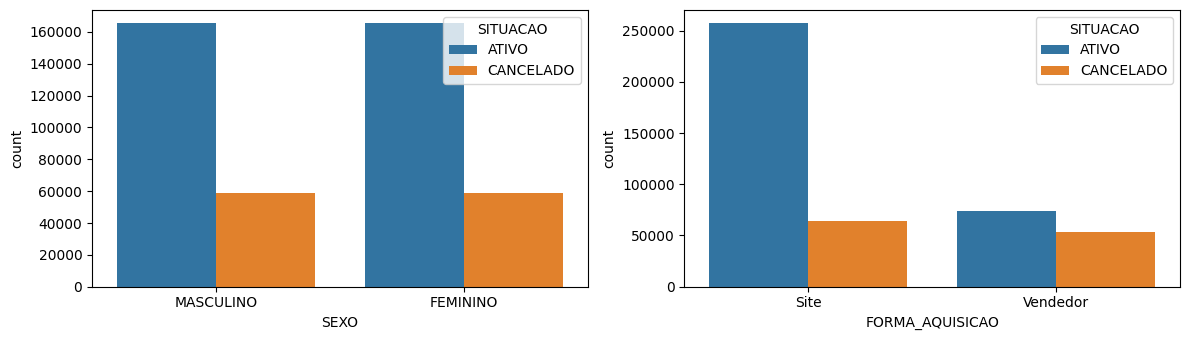

In [17]:
# Analisando o gráfico da variavel FORMA_AQUISICAO e SEXO comparadas a variável ALVO
#Podemos constatar na analise que não há discrepancias nestas variaveis

plt.rcParams["figure.figsize"] = [12.00, 3.50]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(1, 2)
sns.countplot(data = df_original, x = "SEXO", hue = "SITUACAO", ax=axes[0])
sns.countplot(data = df_original, x = "FORMA_AQUISICAO", hue = "SITUACAO", ax=axes[1])
plt.show()

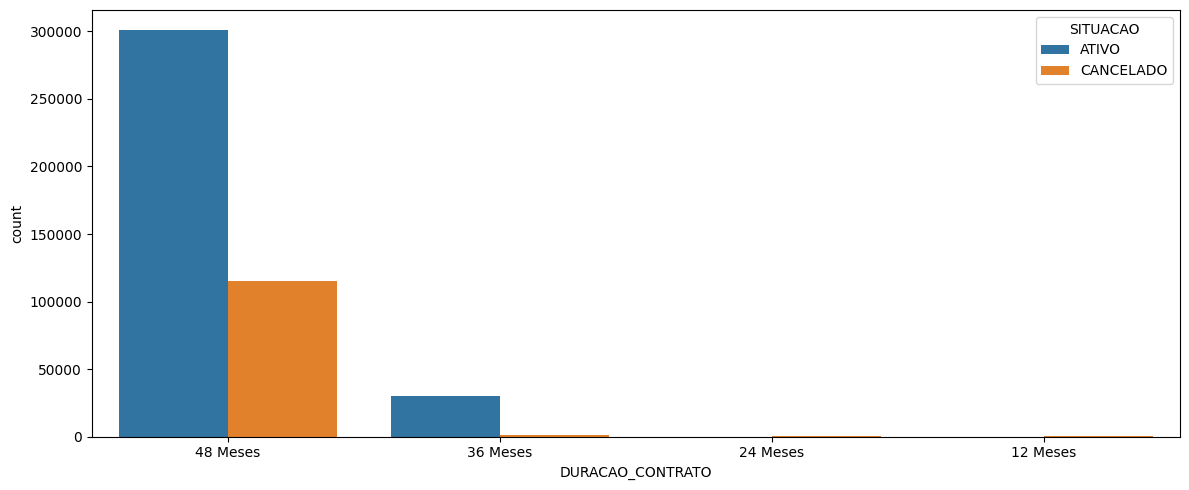

In [18]:
# Analisando o gráfico da variavel DURACAO_CONTRATO comparadas a variável ALVO
#Podemos constatar na analise que não há discrepancias nestas variaveis
plt.rcParams["figure.figsize"] = [12.00, 5.00]
plt.rcParams["figure.autolayout"] = True
sns.countplot(data = df_original, x = "DURACAO_CONTRATO", hue = "SITUACAO")
plt.show()

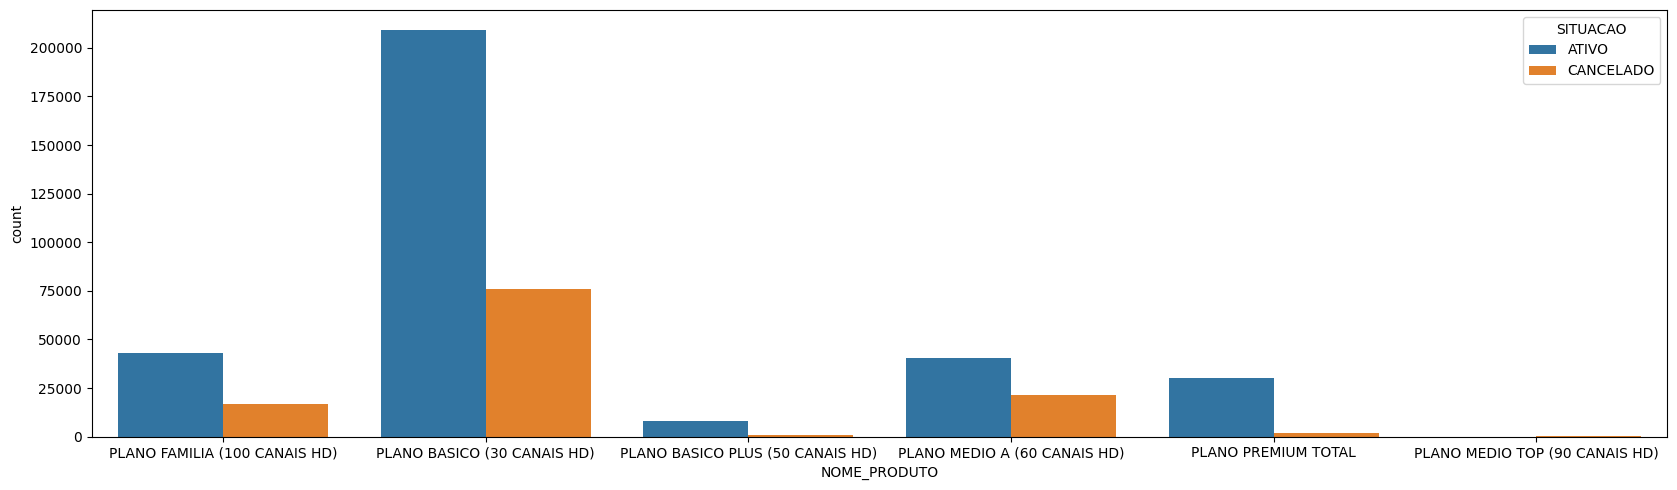

In [19]:
# Analisando o gráfico da variavel NOME_PRODUTO comparadas a variável ALVO
#Podemos constatar na analise que não há discrepancias nestas variaveis
plt.rcParams["figure.figsize"] = [17.00, 5.00]
plt.rcParams["figure.autolayout"] = True
sns.countplot(data = df_original, x = "NOME_PRODUTO", hue = "SITUACAO")
plt.show()

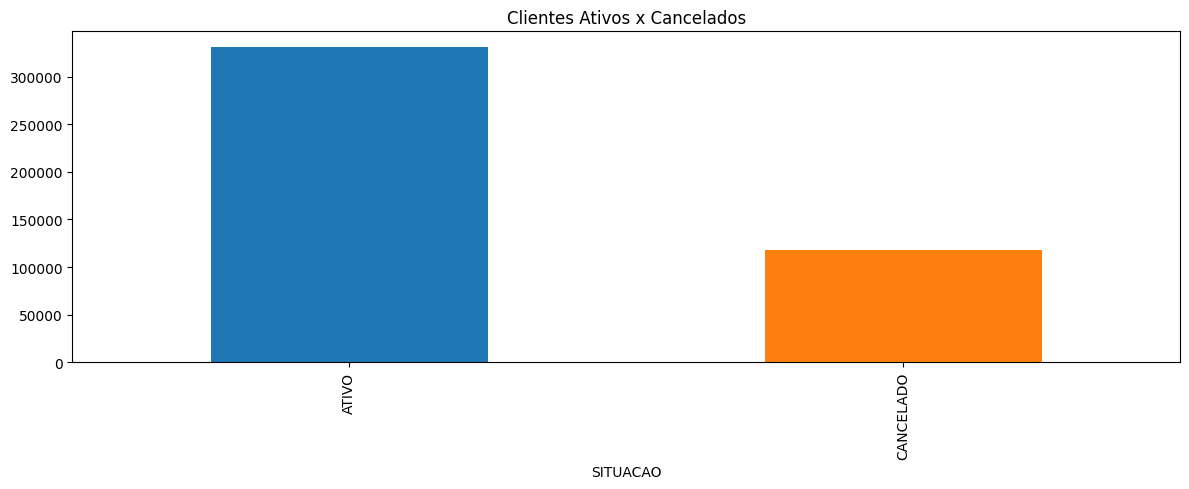

In [20]:
#Analisando como a variavel alvo está distribuida.
#Aqui podemos observar que há muito mais CLIENTES ATIVOS do que CLIENTES CANCELADOS
#dessa forma, precisaremos balancear o dataset na etapa 2 - Tratamento de Dados.
plt.rcParams["figure.figsize"] = [12.00, 5.00]
plt.rcParams["figure.autolayout"] = True
df_original.SITUACAO.value_counts().plot(kind='bar', title='Clientes Ativos x Cancelados',color = ['#1F77B4', '#FF7F0E']);

### Analisando as Variaveis Numéricas

In [21]:
# Carregar variaveis para plot
# Pegaremos a partir da variavel 1 porque o ID_CLIENTE não iremos utilizar
variaveis_numericas = []
for i in df_original.columns[1:24].tolist():
        if df_original.dtypes[i] == 'int64' or df_original.dtypes[i] == 'float64':            
            print(i, ':' , df_original.dtypes[i]) 
            variaveis_numericas.append(i)   

IDADE_CLIENTE : int64
QT_FILHOS : float64
DIAS_ATIVO : int64
MESES_ATIVO : int64
VL_PLANO_ADESAO : int64
VL_PLANO_ATUAL : int64
QT_PONTOS_INSTALADOS : int64
QT_PC_PAGAS : int64
QT_PC_VENCIDAS : int64
QT_PC_PAGA_ATRASO : int64
QT_PC_PAGA_EM_DIA : int64
QT_ACORDO_PAGAMENTO : int64
VL_MENSALIDADE_ATRASO : int64
VL_MENSALIDADE_DT_AQUISICAO : int64
VL_MENSALIDADE_DT_ATUAL : int64
COD_SITUACAO : int64


In [22]:
#Quantidade de variaveis
print(variaveis_numericas)
len(variaveis_numericas)

['IDADE_CLIENTE', 'QT_FILHOS', 'DIAS_ATIVO', 'MESES_ATIVO', 'VL_PLANO_ADESAO', 'VL_PLANO_ATUAL', 'QT_PONTOS_INSTALADOS', 'QT_PC_PAGAS', 'QT_PC_VENCIDAS', 'QT_PC_PAGA_ATRASO', 'QT_PC_PAGA_EM_DIA', 'QT_ACORDO_PAGAMENTO', 'VL_MENSALIDADE_ATRASO', 'VL_MENSALIDADE_DT_AQUISICAO', 'VL_MENSALIDADE_DT_ATUAL', 'COD_SITUACAO']


16

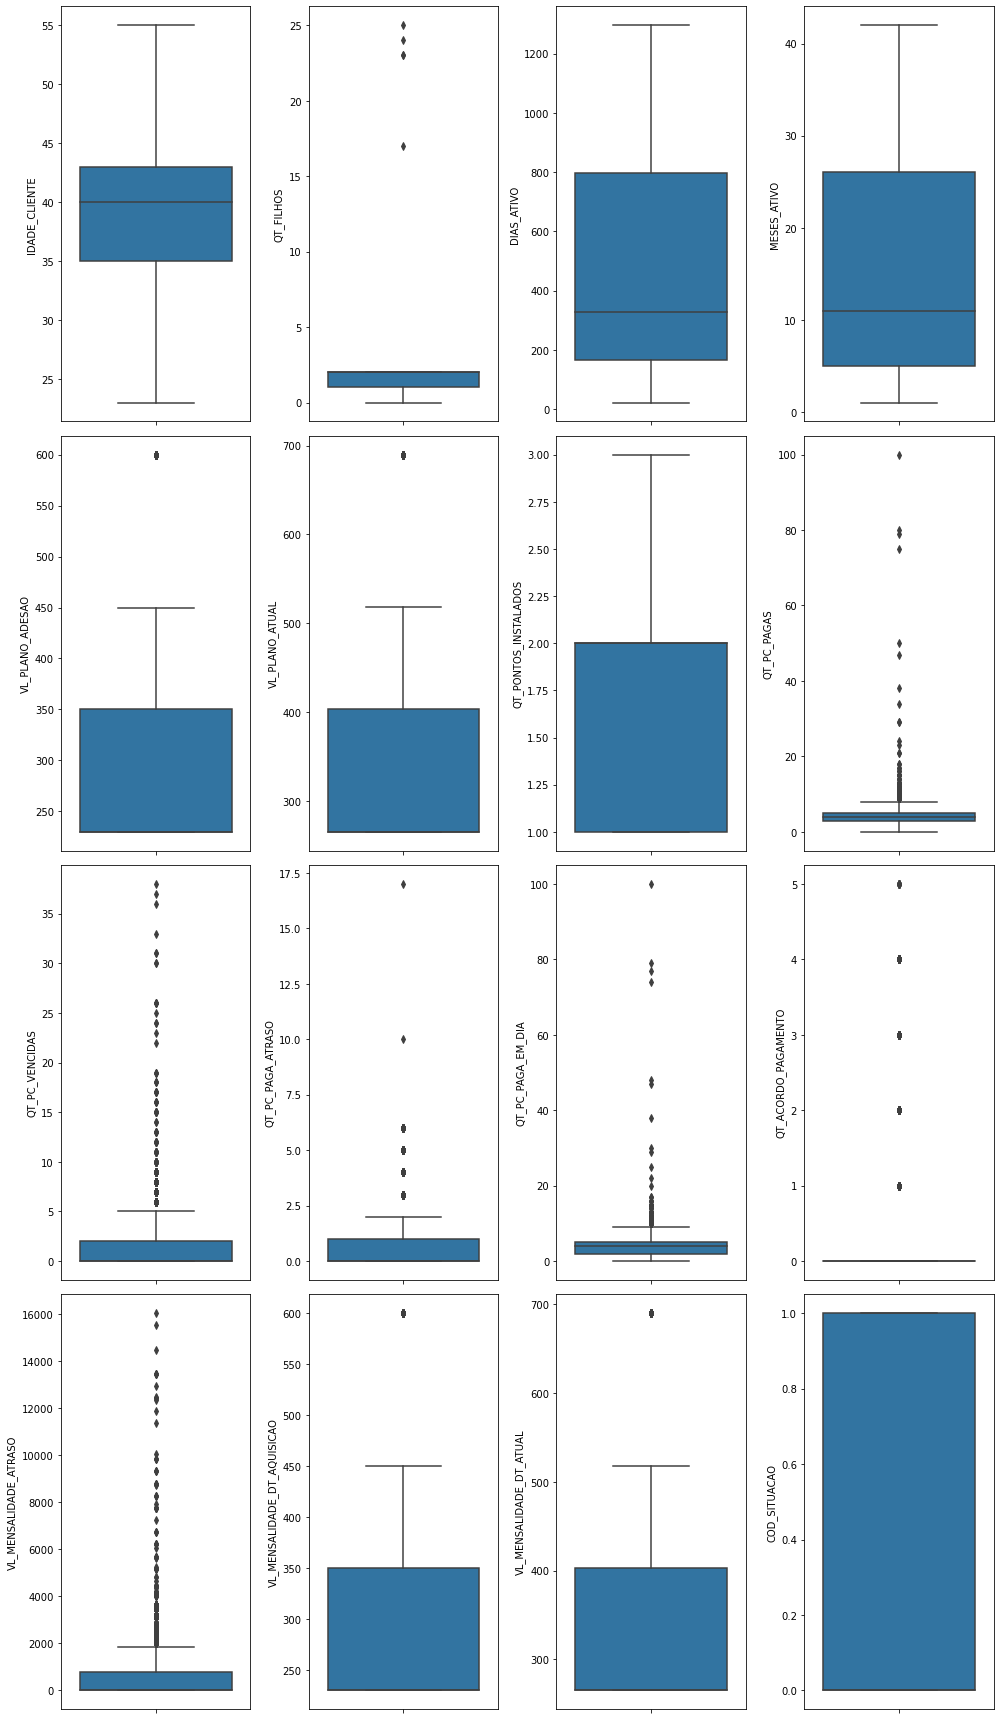

In [21]:
#Podemos observar nos boxplots abaixo que algumas variáveis númericas apresentam uma grande quantidade de "possíveis" outliers
#Precisamos avaliar cada uma dessas variaveis dentro do contexto dos dados para saber se realmente iremos trata-las como outlier

plt.rcParams["figure.figsize"] = [14.00, 24.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(4, 4) #4 linhas e 4 colunas

linha = 0
coluna = 0
for i in variaveis_numericas:
    sns.boxplot(data = df_original, y=i, ax=axes[linha][coluna])
    coluna += 1
    if coluna == 4:
        linha += 1
        coluna = 0            

plt.show()

In [23]:

df_original.groupby(['QT_FILHOS']).size()

QT_FILHOS
0.0         10
1.0     212353
2.0     235825
17.0         1
23.0         2
24.0         1
25.0         1
dtype: int64

In [24]:
# Aqui podemos ver os registros...
df_original.loc[df_original['QT_FILHOS'] > 2]

,ID_CLIENTE,FORMA_AQUISICAO,IDADE_CLIENTE,SEXO,QT_FILHOS,DT_AQUISICAO,DT_CANCELAMENTO,DIAS_ATIVO,MESES_ATIVO,DURACAO_CONTRATO,VL_PLANO_ADESAO,VL_PLANO_ATUAL,NOME_PRODUTO,QT_PONTOS_INSTALADOS,QT_PC_PAGAS,QT_PC_VENCIDAS,QT_PC_PAGA_ATRASO,QT_PC_PAGA_EM_DIA,QT_ACORDO_PAGAMENTO,VL_MENSALIDADE_ATRASO,VL_MENSALIDADE_DT_AQUISICAO,VL_MENSALIDADE_DT_ATUAL,SITUACAO,COD_SITUACAO
3,4,Vendedor,26,FEMININO,17.0,25/06/2019,NaN,757,25,48 Meses,230,265,PLANO BASICO (30 CANAIS HD),1,5,0,1,4,0,0,230,265,ATIVO,0
91,92,Vendedor,48,FEMININO,23.0,03/08/2018,NaN,1083,35,48 Meses,230,265,PLANO BASICO (30 CANAIS HD),2,5,0,1,4,0,0,230,265,ATIVO,0
164,165,Vendedor,55,MASCULINO,23.0,19/06/2018,NaN,1128,37,48 Meses,230,265,PLANO BASICO (30 CANAIS HD),3,5,0,2,3,1,0,230,265,ATIVO,0
273,274,Vendedor,32,FEMININO,24.0,02/05/2018,NaN,1176,38,48 Meses,230,265,PLANO BASICO (30 CANAIS HD),1,5,0,2,3,1,0,230,265,ATIVO,0
454,455,Vendedor,38,MASCULINO,25.0,04/09/2018,NaN,1051,34,48 Meses,230,265,PLANO BASICO (30 CANAIS HD),2,5,0,1,4,1,0,230,265,ATIVO,0


## Tratamento de Dados
<p> Vamos tratar os dados que identificamos na fase de Analise Exploratória<br><br>

1 - Tratar os OUTILIERS <br>
2 - Tratar valores nulos (Variável QT_FILHOS possui 254 valores nulos)<br>
3 - Tratar as variaveis QT_PC_PAGA_EM_DIA e QT_PC_PAGAS <br>
4 - Engenharia de Atributos (Criar variavel NIVEL PAGAMENTO)<br>
5 - Balancear variavel target<br>
6 - Aplicar o OneHotEncoding<br>

In [25]:
# Manteremos o DataFrame Priginal e os dados tratados ficarão no DataFrame chamado df_dados
df_dados = df_original.loc[df_original['QT_FILHOS'] <= 2]
df_dados.shape

(448188, 24)

In [26]:
df_dados.groupby(['QT_FILHOS']).size()

QT_FILHOS
0.0        10
1.0    212353
2.0    235825
dtype: int64

In [27]:
print('Média de Filhos: ', df_dados['QT_FILHOS'].mean())
print('Mediana de Filhos: ',df_dados['QT_FILHOS'].median())
print('Moda: ', df_dados['QT_FILHOS'].mode())

Média de Filhos:  1.5261519719403465
Mediana de Filhos:  2.0
Moda:  0    2.0
Name: QT_FILHOS, dtype: float64


In [28]:
# Preencheremos os valores NULOS com a mediana dos dados
df_dados['QT_FILHOS'] = df_dados['QT_FILHOS'].fillna((df_dados['QT_FILHOS'].median()))
df_dados.isnull().sum()

ID_CLIENTE                          0
FORMA_AQUISICAO                     0
IDADE_CLIENTE                       0
SEXO                                0
QT_FILHOS                           0
DT_AQUISICAO                        0
DT_CANCELAMENTO                330987
DIAS_ATIVO                          0
MESES_ATIVO                         0
DURACAO_CONTRATO                    0
VL_PLANO_ADESAO                     0
VL_PLANO_ATUAL                      0
NOME_PRODUTO                        0
QT_PONTOS_INSTALADOS                0
QT_PC_PAGAS                         0
QT_PC_VENCIDAS                      0
QT_PC_PAGA_ATRASO                   0
QT_PC_PAGA_EM_DIA                   0
QT_ACORDO_PAGAMENTO                 0
VL_MENSALIDADE_ATRASO               0
VL_MENSALIDADE_DT_AQUISICAO         0
VL_MENSALIDADE_DT_ATUAL             0
SITUACAO                            0
COD_SITUACAO                        0
dtype: int64

In [29]:
# Substituindo os dados da variavel DURACAO_CONTRATO para mantermos somente os números
df_dados['DURACAO_CONTRATO'] = df_dados['DURACAO_CONTRATO'].replace(['12 Meses'], 12)
df_dados['DURACAO_CONTRATO'] = df_dados['DURACAO_CONTRATO'].replace(['24 Meses'], 24)
df_dados['DURACAO_CONTRATO'] = df_dados['DURACAO_CONTRATO'].replace(['36 Meses'], 36)
df_dados['DURACAO_CONTRATO'] = df_dados['DURACAO_CONTRATO'].replace(['48 Meses'], 48)

In [30]:
# Visualizando as primeiras linhas do dataset
df_dados.head()

,ID_CLIENTE,FORMA_AQUISICAO,IDADE_CLIENTE,SEXO,QT_FILHOS,DT_AQUISICAO,DT_CANCELAMENTO,DIAS_ATIVO,MESES_ATIVO,DURACAO_CONTRATO,VL_PLANO_ADESAO,VL_PLANO_ATUAL,NOME_PRODUTO,QT_PONTOS_INSTALADOS,QT_PC_PAGAS,QT_PC_VENCIDAS,QT_PC_PAGA_ATRASO,QT_PC_PAGA_EM_DIA,QT_ACORDO_PAGAMENTO,VL_MENSALIDADE_ATRASO,VL_MENSALIDADE_DT_AQUISICAO,VL_MENSALIDADE_DT_ATUAL,SITUACAO,COD_SITUACAO
0,1,Site,23,MASCULINO,0.0,18/06/2021,NaN,33,1,48,450,518,PLANO FAMILIA (100 CANAIS HD),1,1,4,0,1,1,2070,450,518,ATIVO,0
1,2,Vendedor,24,FEMININO,0.0,10/04/2018,NaN,1198,39,48,230,265,PLANO BASICO (30 CANAIS HD),2,5,0,1,4,0,0,230,265,ATIVO,0
2,3,Site,25,MASCULINO,0.0,09/10/2020,NaN,285,9,48,290,334,PLANO BASICO PLUS (50 CANAIS HD),3,5,0,3,2,0,0,290,334,ATIVO,0
4,5,Vendedor,27,MASCULINO,0.0,19/09/2019,NaN,671,22,48,230,265,PLANO BASICO (30 CANAIS HD),2,5,0,5,0,0,0,230,265,ATIVO,0
5,6,Vendedor,28,FEMININO,1.0,23/03/2018,NaN,1216,40,48,230,265,PLANO BASICO (30 CANAIS HD),3,5,0,0,5,0,0,230,265,ATIVO,0


In [31]:
# Visualizando as informações dos tipos de variaveis
df_dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 448188 entries, 0 to 448446
Data columns (total 24 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   ID_CLIENTE                   448188 non-null  int64  
 1   FORMA_AQUISICAO              448188 non-null  object 
 2   IDADE_CLIENTE                448188 non-null  int64  
 3   SEXO                         448188 non-null  object 
 4   QT_FILHOS                    448188 non-null  float64
 5   DT_AQUISICAO                 448188 non-null  object 
 6   DT_CANCELAMENTO              117201 non-null  object 
 7   DIAS_ATIVO                   448188 non-null  int64  
 8   MESES_ATIVO                  448188 non-null  int64  
 9   DURACAO_CONTRATO             448188 non-null  int64  
 10  VL_PLANO_ADESAO              448188 non-null  int64  
 11  VL_PLANO_ATUAL               448188 non-null  int64  
 12  NOME_PRODUTO                 448188 non-null  object 
 13  QT_P

In [32]:
# Identificando as quantidades máximas para tratar os OUTLIERS
print(df_dados['QT_PC_PAGAS'].max())
print(df_dados['QT_PC_PAGA_EM_DIA'].max())

100
100


In [33]:
# Registros que possuirem as quantidades superiores a duração do contrato, iremos alterar e colocar o número de duração contrato
df_dados.loc[df_dados.QT_PC_PAGAS > df_dados.DURACAO_CONTRATO, 'QT_PC_PAGAS'] = df_dados.DURACAO_CONTRATO
df_dados.loc[df_dados.QT_PC_PAGA_EM_DIA > df_dados.DURACAO_CONTRATO, 'QT_PC_PAGA_EM_DIA'] = df_dados.DURACAO_CONTRATO

In [34]:
# Verificando se as variáveis foram ajustadas
print(df_dados['QT_PC_PAGAS'].max())
print(df_dados['QT_PC_PAGA_EM_DIA'].max())

48
48


In [35]:
df_dados.head()

,ID_CLIENTE,FORMA_AQUISICAO,IDADE_CLIENTE,SEXO,QT_FILHOS,DT_AQUISICAO,DT_CANCELAMENTO,DIAS_ATIVO,MESES_ATIVO,DURACAO_CONTRATO,VL_PLANO_ADESAO,VL_PLANO_ATUAL,NOME_PRODUTO,QT_PONTOS_INSTALADOS,QT_PC_PAGAS,QT_PC_VENCIDAS,QT_PC_PAGA_ATRASO,QT_PC_PAGA_EM_DIA,QT_ACORDO_PAGAMENTO,VL_MENSALIDADE_ATRASO,VL_MENSALIDADE_DT_AQUISICAO,VL_MENSALIDADE_DT_ATUAL,SITUACAO,COD_SITUACAO
0,1,Site,23,MASCULINO,0.0,18/06/2021,NaN,33,1,48,450,518,PLANO FAMILIA (100 CANAIS HD),1,1,4,0,1,1,2070,450,518,ATIVO,0
1,2,Vendedor,24,FEMININO,0.0,10/04/2018,NaN,1198,39,48,230,265,PLANO BASICO (30 CANAIS HD),2,5,0,1,4,0,0,230,265,ATIVO,0
2,3,Site,25,MASCULINO,0.0,09/10/2020,NaN,285,9,48,290,334,PLANO BASICO PLUS (50 CANAIS HD),3,5,0,3,2,0,0,290,334,ATIVO,0
4,5,Vendedor,27,MASCULINO,0.0,19/09/2019,NaN,671,22,48,230,265,PLANO BASICO (30 CANAIS HD),2,5,0,5,0,0,0,230,265,ATIVO,0
5,6,Vendedor,28,FEMININO,1.0,23/03/2018,NaN,1216,40,48,230,265,PLANO BASICO (30 CANAIS HD),3,5,0,0,5,0,0,230,265,ATIVO,0


In [36]:
# Engenharia de Atributos
# Criando uma nova variável de categoria de nivel de pagamento de acordo com a quantidade de parcelas pagas
bins = [-100, 3, 6, 12, 48]
labels = ['RUIM', 'MEDIO', 'BOM', 'OTIMO']
df_dados['NIVEL_PAGAMENTO'] = pd.cut(df_dados['QT_PC_PAGAS'], bins=bins, labels=labels)
pd.value_counts(df_dados.NIVEL_PAGAMENTO)

NIVEL_PAGAMENTO
MEDIO    297750
RUIM     149912
BOM         488
OTIMO        38
Name: count, dtype: int64

In [37]:
# Visualizando as primeiras linhas do dataset
df_dados.head()

,ID_CLIENTE,FORMA_AQUISICAO,IDADE_CLIENTE,SEXO,QT_FILHOS,DT_AQUISICAO,DT_CANCELAMENTO,DIAS_ATIVO,MESES_ATIVO,DURACAO_CONTRATO,VL_PLANO_ADESAO,VL_PLANO_ATUAL,NOME_PRODUTO,QT_PONTOS_INSTALADOS,QT_PC_PAGAS,QT_PC_VENCIDAS,QT_PC_PAGA_ATRASO,QT_PC_PAGA_EM_DIA,QT_ACORDO_PAGAMENTO,VL_MENSALIDADE_ATRASO,VL_MENSALIDADE_DT_AQUISICAO,VL_MENSALIDADE_DT_ATUAL,SITUACAO,COD_SITUACAO,NIVEL_PAGAMENTO
0,1,Site,23,MASCULINO,0.0,18/06/2021,NaN,33,1,48,450,518,PLANO FAMILIA (100 CANAIS HD),1,1,4,0,1,1,2070,450,518,ATIVO,0,RUIM
1,2,Vendedor,24,FEMININO,0.0,10/04/2018,NaN,1198,39,48,230,265,PLANO BASICO (30 CANAIS HD),2,5,0,1,4,0,0,230,265,ATIVO,0,MEDIO
2,3,Site,25,MASCULINO,0.0,09/10/2020,NaN,285,9,48,290,334,PLANO BASICO PLUS (50 CANAIS HD),3,5,0,3,2,0,0,290,334,ATIVO,0,MEDIO
4,5,Vendedor,27,MASCULINO,0.0,19/09/2019,NaN,671,22,48,230,265,PLANO BASICO (30 CANAIS HD),2,5,0,5,0,0,0,230,265,ATIVO,0,MEDIO
5,6,Vendedor,28,FEMININO,1.0,23/03/2018,NaN,1216,40,48,230,265,PLANO BASICO (30 CANAIS HD),3,5,0,0,5,0,0,230,265,ATIVO,0,MEDIO


In [38]:
# Fazendo uma cópia do DataFrame
df_dados_2 = df_dados.copy()
df_dados_2.head()

,ID_CLIENTE,FORMA_AQUISICAO,IDADE_CLIENTE,SEXO,QT_FILHOS,DT_AQUISICAO,DT_CANCELAMENTO,DIAS_ATIVO,MESES_ATIVO,DURACAO_CONTRATO,VL_PLANO_ADESAO,VL_PLANO_ATUAL,NOME_PRODUTO,QT_PONTOS_INSTALADOS,QT_PC_PAGAS,QT_PC_VENCIDAS,QT_PC_PAGA_ATRASO,QT_PC_PAGA_EM_DIA,QT_ACORDO_PAGAMENTO,VL_MENSALIDADE_ATRASO,VL_MENSALIDADE_DT_AQUISICAO,VL_MENSALIDADE_DT_ATUAL,SITUACAO,COD_SITUACAO,NIVEL_PAGAMENTO
0,1,Site,23,MASCULINO,0.0,18/06/2021,NaN,33,1,48,450,518,PLANO FAMILIA (100 CANAIS HD),1,1,4,0,1,1,2070,450,518,ATIVO,0,RUIM
1,2,Vendedor,24,FEMININO,0.0,10/04/2018,NaN,1198,39,48,230,265,PLANO BASICO (30 CANAIS HD),2,5,0,1,4,0,0,230,265,ATIVO,0,MEDIO
2,3,Site,25,MASCULINO,0.0,09/10/2020,NaN,285,9,48,290,334,PLANO BASICO PLUS (50 CANAIS HD),3,5,0,3,2,0,0,290,334,ATIVO,0,MEDIO
4,5,Vendedor,27,MASCULINO,0.0,19/09/2019,NaN,671,22,48,230,265,PLANO BASICO (30 CANAIS HD),2,5,0,5,0,0,0,230,265,ATIVO,0,MEDIO
5,6,Vendedor,28,FEMININO,1.0,23/03/2018,NaN,1216,40,48,230,265,PLANO BASICO (30 CANAIS HD),3,5,0,0,5,0,0,230,265,ATIVO,0,MEDIO


In [39]:
# Cria o encoder
lb = LabelEncoder()

# Aplica o encoder nas variáveis que estão com string
# O encoder irá transformar essas variáveis em números (Lembre-se, os algoritmos de Machine Learning só entendem números)
df_dados_2['SEXO'] = lb.fit_transform(df_dados_2['SEXO'])
df_dados_2['FORMA_AQUISICAO'] = lb.fit_transform(df_dados_2['FORMA_AQUISICAO'])
df_dados_2['NOME_PRODUTO'] = lb.fit_transform(df_dados_2['NOME_PRODUTO'])
df_dados_2['NIVEL_PAGAMENTO'] = lb.fit_transform(df_dados_2['NIVEL_PAGAMENTO'])

In [40]:
# Visualizando as primerias 20 linhas do Dataset
df_dados_2.head(20)

,ID_CLIENTE,FORMA_AQUISICAO,IDADE_CLIENTE,SEXO,QT_FILHOS,DT_AQUISICAO,DT_CANCELAMENTO,DIAS_ATIVO,MESES_ATIVO,DURACAO_CONTRATO,VL_PLANO_ADESAO,VL_PLANO_ATUAL,NOME_PRODUTO,QT_PONTOS_INSTALADOS,QT_PC_PAGAS,QT_PC_VENCIDAS,QT_PC_PAGA_ATRASO,QT_PC_PAGA_EM_DIA,QT_ACORDO_PAGAMENTO,VL_MENSALIDADE_ATRASO,VL_MENSALIDADE_DT_AQUISICAO,VL_MENSALIDADE_DT_ATUAL,SITUACAO,COD_SITUACAO,NIVEL_PAGAMENTO
0,1,0,23,1,0.0,18/06/2021,NaN,33,1,48,450,518,2,1,1,4,0,1,1,2070,450,518,ATIVO,0,3
1,2,1,24,0,0.0,10/04/2018,NaN,1198,39,48,230,265,0,2,5,0,1,4,0,0,230,265,ATIVO,0,1
2,3,0,25,1,0.0,09/10/2020,NaN,285,9,48,290,334,1,3,5,0,3,2,0,0,290,334,ATIVO,0,1
4,5,1,27,1,0.0,19/09/2019,NaN,671,22,48,230,265,0,2,5,0,5,0,0,0,230,265,ATIVO,0,1
5,6,1,28,0,1.0,23/03/2018,NaN,1216,40,48,230,265,0,3,5,0,0,5,0,0,230,265,ATIVO,0,1
6,7,1,29,1,2.0,04/02/2019,NaN,898,29,48,350,403,3,1,1,0,0,1,0,0,350,403,ATIVO,0,3
7,8,0,30,0,1.0,11/11/2020,NaN,252,8,48,230,265,0,2,5,0,2,3,1,0,230,265,ATIVO,0,1
8,9,1,31,1,2.0,31/07/2018,NaN,1086,36,48,290,334,1,3,4,0,2,2,0,0,290,334,ATIVO,0,1
9,10,0,32,0,1.0,03/05/2021,NaN,79,2,48,230,265,0,1,2,3,1,1,1,794,230,265,ATIVO,0,3
10,11,0,33,1,2.0,16/06/2021,NaN,35,1,48,230,265,0,2,1,5,0,1,1,1323,230,265,ATIVO,0,3


In [41]:
#Listando as colunas do nosso Dataset
df_dados_2.columns.tolist()

['ID_CLIENTE',
 'FORMA_AQUISICAO',
 'IDADE_CLIENTE',
 'SEXO',
 'QT_FILHOS',
 'DT_AQUISICAO',
 'DT_CANCELAMENTO',
 'DIAS_ATIVO',
 'MESES_ATIVO',
 'DURACAO_CONTRATO',
 'VL_PLANO_ADESAO',
 'VL_PLANO_ATUAL',
 'NOME_PRODUTO',
 'QT_PONTOS_INSTALADOS',
 'QT_PC_PAGAS',
 'QT_PC_VENCIDAS',
 'QT_PC_PAGA_ATRASO',
 'QT_PC_PAGA_EM_DIA',
 'QT_ACORDO_PAGAMENTO',
 'VL_MENSALIDADE_ATRASO',
 'VL_MENSALIDADE_DT_AQUISICAO',
 'VL_MENSALIDADE_DT_ATUAL',
 'SITUACAO',
 'COD_SITUACAO',
 'NIVEL_PAGAMENTO']

In [42]:
# Vamos filtrar e utilizar somente as colunas necessárias
columns = ['FORMA_AQUISICAO',
 'IDADE_CLIENTE',
 'SEXO',
 'QT_FILHOS', 
 'DIAS_ATIVO',
 'MESES_ATIVO',
 'DURACAO_CONTRATO',
 'VL_PLANO_ADESAO',
 'VL_PLANO_ATUAL',
 'NOME_PRODUTO',
 'QT_PONTOS_INSTALADOS',
 'QT_PC_PAGAS',
 'QT_PC_VENCIDAS',
 'QT_PC_PAGA_ATRASO',
 'QT_PC_PAGA_EM_DIA',
 'QT_ACORDO_PAGAMENTO',
 'VL_MENSALIDADE_ATRASO',
 'VL_MENSALIDADE_DT_AQUISICAO',
 'VL_MENSALIDADE_DT_ATUAL',
 'NIVEL_PAGAMENTO',
 'COD_SITUACAO']

df_dados_2 = pd.DataFrame(df_dados_2, columns=columns)

In [43]:
# Visualizando as primeiras linhas do arquivo novamente
df_dados_2.head()

,FORMA_AQUISICAO,IDADE_CLIENTE,SEXO,QT_FILHOS,DIAS_ATIVO,MESES_ATIVO,DURACAO_CONTRATO,VL_PLANO_ADESAO,VL_PLANO_ATUAL,NOME_PRODUTO,QT_PONTOS_INSTALADOS,QT_PC_PAGAS,QT_PC_VENCIDAS,QT_PC_PAGA_ATRASO,QT_PC_PAGA_EM_DIA,QT_ACORDO_PAGAMENTO,VL_MENSALIDADE_ATRASO,VL_MENSALIDADE_DT_AQUISICAO,VL_MENSALIDADE_DT_ATUAL,NIVEL_PAGAMENTO,COD_SITUACAO
0,0,23,1,0.0,33,1,48,450,518,2,1,1,4,0,1,1,2070,450,518,3,0
1,1,24,0,0.0,1198,39,48,230,265,0,2,5,0,1,4,0,0,230,265,1,0
2,0,25,1,0.0,285,9,48,290,334,1,3,5,0,3,2,0,0,290,334,1,0
4,1,27,1,0.0,671,22,48,230,265,0,2,5,0,5,0,0,0,230,265,1,0
5,1,28,0,1.0,1216,40,48,230,265,0,3,5,0,0,5,0,0,230,265,1,0


In [44]:
# Verificando os tipos de variáveis
df_dados_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 448188 entries, 0 to 448446
Data columns (total 21 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   FORMA_AQUISICAO              448188 non-null  int32  
 1   IDADE_CLIENTE                448188 non-null  int64  
 2   SEXO                         448188 non-null  int32  
 3   QT_FILHOS                    448188 non-null  float64
 4   DIAS_ATIVO                   448188 non-null  int64  
 5   MESES_ATIVO                  448188 non-null  int64  
 6   DURACAO_CONTRATO             448188 non-null  int64  
 7   VL_PLANO_ADESAO              448188 non-null  int64  
 8   VL_PLANO_ATUAL               448188 non-null  int64  
 9   NOME_PRODUTO                 448188 non-null  int32  
 10  QT_PONTOS_INSTALADOS         448188 non-null  int64  
 11  QT_PC_PAGAS                  448188 non-null  int64  
 12  QT_PC_VENCIDAS               448188 non-null  int64  
 13  QT_P

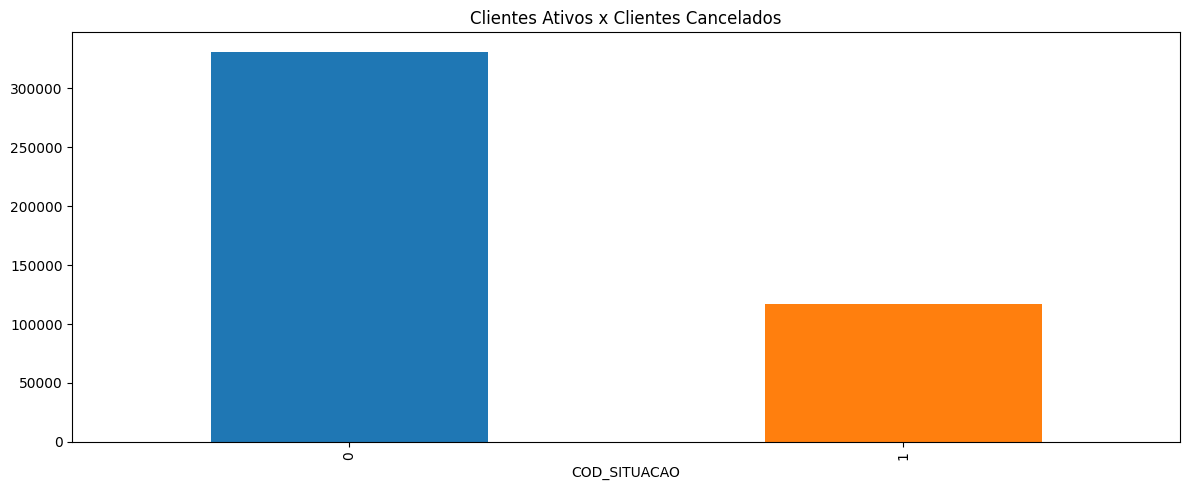

In [45]:
#Analisando como a variavel alvo está distribuida.
#Aqui podemos observar que há muito mais CLIENTES ATIVOS do que CLIENTES CANCELADOS
#dessa forma, precisaremos balancear o dataset na etapa 2 - Tratamento de Dados.
plt.rcParams["figure.figsize"] = [12.00, 5.00]
plt.rcParams["figure.autolayout"] = True
df_dados_2.COD_SITUACAO.value_counts().plot(kind='bar', title='Clientes Ativos x Clientes Cancelados',color = ['#1F77B4', '#FF7F0E']);

In [46]:
#Separar variaveis preditoras e target
PREDITORAS = df_dados_2.iloc[:, 0:20]  
TARGET = df_dados_2.iloc[:, 20] 

In [47]:
PREDITORAS.head()

,FORMA_AQUISICAO,IDADE_CLIENTE,SEXO,QT_FILHOS,DIAS_ATIVO,MESES_ATIVO,DURACAO_CONTRATO,VL_PLANO_ADESAO,VL_PLANO_ATUAL,NOME_PRODUTO,QT_PONTOS_INSTALADOS,QT_PC_PAGAS,QT_PC_VENCIDAS,QT_PC_PAGA_ATRASO,QT_PC_PAGA_EM_DIA,QT_ACORDO_PAGAMENTO,VL_MENSALIDADE_ATRASO,VL_MENSALIDADE_DT_AQUISICAO,VL_MENSALIDADE_DT_ATUAL,NIVEL_PAGAMENTO
0,0,23,1,0.0,33,1,48,450,518,2,1,1,4,0,1,1,2070,450,518,3
1,1,24,0,0.0,1198,39,48,230,265,0,2,5,0,1,4,0,0,230,265,1
2,0,25,1,0.0,285,9,48,290,334,1,3,5,0,3,2,0,0,290,334,1
4,1,27,1,0.0,671,22,48,230,265,0,2,5,0,5,0,0,0,230,265,1
5,1,28,0,1.0,1216,40,48,230,265,0,3,5,0,0,5,0,0,230,265,1


In [48]:
TARGET.head()

0    0
1    0
2    0
4    0
5    0
Name: COD_SITUACAO, dtype: int64

In [49]:
# Seed para reproduzir o mesmo resultado
seed = 100

# Cria o balanceador SMOTE
balanceador = SMOTE(random_state = seed)

# Aplica o balanceador
PREDITORAS_RES, TARGET_RES = balanceador.fit_resample(PREDITORAS, TARGET)

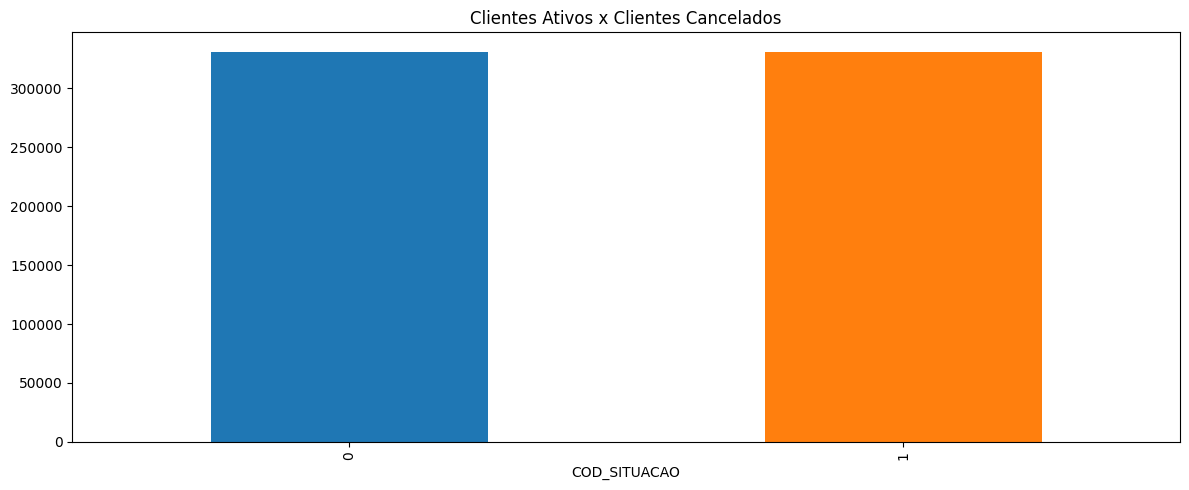

In [50]:
# Visualizando o balanceamento da variável TARGET
plt.rcParams["figure.figsize"] = [12.00, 5.00]
plt.rcParams["figure.autolayout"] = True
TARGET_RES.value_counts().plot(kind='bar', title='Clientes Ativos x Clientes Cancelados',color = ['#1F77B4', '#FF7F0E']);

In [51]:
# Quantidade de registros antes do balanceamento
PREDITORAS.shape

(448188, 20)

In [52]:
# Quantidade de registros antes do balanceamento
TARGET.shape

(448188,)

In [53]:
# Quantidade de registros após do balanceamento
PREDITORAS_RES.shape

(661974, 20)

In [54]:
# Quantidade de registros após do balanceamento
TARGET_RES.shape

(661974,)

In [55]:
# Divisão em Dados de Treino e Teste.
X_treino, X_teste, Y_treino, Y_teste = train_test_split(PREDITORAS_RES, TARGET_RES, test_size = 0.3, random_state = 42)

In [56]:
# Padronizando as Variáveis - Pré Processamento dos Dados
Padronizador = StandardScaler()
X_treino_padronizados = Padronizador.fit_transform(X_treino)
X_teste_padronizados = Padronizador.transform(X_teste)

In [57]:
# Visualizando os dados padronizados
X_treino_padronizados

array([[-0.69344562,  0.53255991,  1.06022683, ...,  1.41114896,
         1.41223978, -0.94605613],
       [ 1.44207415, -0.02658459, -0.94319439, ...,  1.41114896,
         1.41223978,  1.05546166],
       [-0.69344562, -0.02658459, -0.94319439, ...,  2.81634037,
         2.81422044, -0.94605613],
       ...,
       [-0.69344562, -1.56423196, -0.94319439, ..., -0.64979845,
        -0.64997596, -0.94605613],
       [ 1.44207415,  0.53255991, -0.94319439, ...,  0.47435468,
         0.47486899,  1.05546166],
       [ 1.44207415,  0.53255991, -0.94319439, ...,  1.41114896,
         1.41223978, -0.94605613]])

In [75]:
X_teste_padronizados

array([[-0.69344562,  0.39277379,  1.06022683, ..., -0.64979845,
        -0.64997596, -0.94605613],
       [ 1.44207415, -0.02658459, -0.94319439, ..., -0.64979845,
        -0.64997596,  1.05546166],
       [ 1.44207415, -0.44594296,  1.06022683, ..., -0.64979845,
        -0.64997596, -0.94605613],
       ...,
       [-0.69344562,  1.79063503,  1.06022683, ...,  2.81634037,
         2.81422044,  1.05546166],
       [-0.69344562, -0.16637071,  1.06022683, ..., -0.08772189,
        -0.08755349,  1.05546166],
       [ 1.44207415,  0.67234604,  1.06022683, ..., -0.64979845,
        -0.64997596, -0.94605613]])

In [58]:
# Range de valores de k que iremos testar
kVals = range(3, 10, 2)

In [59]:
# Lista vazia para receber as acurácias
acuracias = []

In [60]:
start = time.time()
for k in kVals:
    
    # Treinando o modelo KNN com cada valor de k
    modeloKNN = KNeighborsClassifier(n_neighbors = k)
    modeloKNN.fit(X_treino_padronizados, Y_treino)
          
    # Avaliando o modelo e atualizando a lista de acurácias
    score = modeloKNN.score(X_teste_padronizados, Y_teste)
    print("Com valor de k = %d, a acurácia é = %.2f%%" % (k, score * 100))
    acuracias.append(score)
end = time.time()
print('Tempo de Treinamento do Modelo:', end - start)    

Com valor de k = 3, a acurácia é = 97.69%
Com valor de k = 5, a acurácia é = 97.38%
Com valor de k = 7, a acurácia é = 97.20%
Com valor de k = 9, a acurácia é = 97.03%
Tempo de Treinamento do Modelo: 333.1429305076599


In [61]:
# Obtendo o valor de k que apresentou a maior acurácia
i = np.argmax(acuracias)
print("O valor de k = %d alcançou a mais alta acurácia de %.2f%% nos dados de validação!" % (kVals[i], 
                                                                                             acuracias[i] * 100))

O valor de k = 3 alcançou a mais alta acurácia de 97.69% nos dados de validação!


In [62]:
# Criando a versão final do modelo com o maior valor de k
modeloFinal = KNeighborsClassifier(n_neighbors = kVals[i])

In [63]:
# Treinamento do modelo
# Observe que neste caso usou a metrica de distancia de minkowski mas isso podemos mudar os parametros...
modeloFinal.fit(X_treino_padronizados, Y_treino)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Previsões com os dados de teste
#previsoes = modeloFinal.predict(X_teste_padronizados)

In [65]:
print('Acurácia do modelo: ' , accuracy_score(Y_teste, previsoes))

Acurácia do modelo:  0.9769327216971394


In [69]:
# Para salvar o modelo treinado
from joblib import dump

In [72]:
# Salve o modelo em um arquivo, por exemplo, "modelo_final.joblib"
dump(modeloFinal, 'modelo_final.joblib')

['modelo_final.joblib']

In [ ]:
# importa o modelo treinado
from joblib import load
modelo = load('modelo_final.joblib')


In [85]:
# Supondo que `dados_novos_clientes` seja o DataFrame preparado com as mesmas colunas do treinamento
previsoes = modelo.predict(X_teste_padronizados)


In [89]:
limiar_de_risco = previsoes.mean() + previsoes.std()  # Exemplo: média + desvio padrão
clientes_alto_risco = X_teste_padronizados[previsoes > 0]

In [ ]:
print(previsoes)

id = []
# coleta os índices dos considerados como clientes de risco
for posicao, previsao in enumerate(previsoes):  
    if previsao == 1:
        id.append(posicao)

print(id)


[0 1 0 ... 1 0 1]
[0, 2, 3, 4, 5, 6, 16, 19, 22, 23, 25, 27, 29, 30, 31, 33, 35, 36, 37, 38, 41, 42, 43, 44, 45, 46, 48, 51, 52, 53, 55, 56, 61, 62, 63, 66, 67, 68, 70, 72, 74, 75, 76, 79, 80, 81, 82, 83, 84, 85, 87, 88, 91, 94, 95, 99, 100, 102, 103, 105, 106, 107, 111, 114, 121, 124, 125, 127, 131, 132, 133, 136, 137, 138, 140, 141, 143, 149, 151, 153, 155, 156, 159, 160, 161, 162, 163, 164, 166, 169, 171, 172, 175, 176, 179, 183, 184, 185, 192, 195, 197, 198, 199, 200, 202, 203, 204, 205, 207, 208, 209, 213, 215, 219, 220, 222, 223, 224, 226, 228, 233, 234, 237, 238, 240, 242, 243, 245, 249, 255, 258, 261, 264, 266, 268, 269, 272, 275, 276, 281, 282, 287, 289, 291, 292, 293, 295, 297, 299, 300, 302, 307, 310, 312, 313, 315, 316, 317, 318, 319, 320, 322, 325, 326, 327, 328, 330, 332, 333, 334, 337, 340, 343, 344, 345, 346, 349, 351, 353, 354, 356, 361, 363, 365, 366, 369, 372, 373, 377, 381, 384, 385, 386, 388, 389, 391, 392, 393, 398, 401, 402, 404, 405, 406, 407, 408, 409, 412, 413

In [108]:
# Seleciona as linhas com os índices especificados na lista 'id'
df_filtrado = df_dados.iloc[id]


df_filtrado.head(20)



,ID_CLIENTE,FORMA_AQUISICAO,IDADE_CLIENTE,SEXO,QT_FILHOS,DT_AQUISICAO,DT_CANCELAMENTO,DIAS_ATIVO,MESES_ATIVO,DURACAO_CONTRATO,VL_PLANO_ADESAO,VL_PLANO_ATUAL,NOME_PRODUTO,QT_PONTOS_INSTALADOS,QT_PC_PAGAS,QT_PC_VENCIDAS,QT_PC_PAGA_ATRASO,QT_PC_PAGA_EM_DIA,QT_ACORDO_PAGAMENTO,VL_MENSALIDADE_ATRASO,VL_MENSALIDADE_DT_AQUISICAO,VL_MENSALIDADE_DT_ATUAL,SITUACAO,COD_SITUACAO,NIVEL_PAGAMENTO
0,1,Site,23,MASCULINO,0.0,18/06/2021,NaN,33,1,48,450,518,PLANO FAMILIA (100 CANAIS HD),1,1,4,0,1,1,2070,450,518,ATIVO,0,RUIM
2,3,Site,25,MASCULINO,0.0,09/10/2020,NaN,285,9,48,290,334,PLANO BASICO PLUS (50 CANAIS HD),3,5,0,3,2,0,0,290,334,ATIVO,0,MEDIO
4,5,Vendedor,27,MASCULINO,0.0,19/09/2019,NaN,671,22,48,230,265,PLANO BASICO (30 CANAIS HD),2,5,0,5,0,0,0,230,265,ATIVO,0,MEDIO
5,6,Vendedor,28,FEMININO,1.0,23/03/2018,NaN,1216,40,48,230,265,PLANO BASICO (30 CANAIS HD),3,5,0,0,5,0,0,230,265,ATIVO,0,MEDIO
6,7,Vendedor,29,MASCULINO,2.0,04/02/2019,NaN,898,29,48,350,403,PLANO MEDIO A (60 CANAIS HD),1,1,0,0,1,0,0,350,403,ATIVO,0,RUIM
7,8,Site,30,FEMININO,1.0,11/11/2020,NaN,252,8,48,230,265,PLANO BASICO (30 CANAIS HD),2,5,0,2,3,1,0,230,265,ATIVO,0,MEDIO
17,18,Vendedor,40,FEMININO,1.0,04/02/2019,NaN,898,29,48,350,403,PLANO MEDIO A (60 CANAIS HD),3,1,0,0,1,0,0,350,403,ATIVO,0,RUIM
20,21,Site,43,MASCULINO,2.0,05/11/2020,NaN,258,8,48,230,265,PLANO BASICO (30 CANAIS HD),3,2,0,0,2,1,0,230,265,ATIVO,0,RUIM
23,24,Vendedor,46,FEMININO,1.0,02/05/2018,NaN,1176,38,48,230,265,PLANO BASICO (30 CANAIS HD),3,5,0,0,5,0,0,230,265,ATIVO,0,MEDIO
24,25,Vendedor,47,MASCULINO,2.0,18/12/2018,NaN,946,31,48,350,403,PLANO MEDIO A (60 CANAIS HD),1,3,0,2,1,0,0,350,403,ATIVO,0,RUIM
